In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from download_data import download_data


MAX_ITERATIONS = 50;
MIN_SAMPLE_CHANGE = 0


colors=['red', 'blue', 'black', 'brown', 'c', 'm', 'y', 'k', 'w', 'orange']


def run_kmeans_clustering(k_value=2, showPlots=False, data=None):
    """  Calculate K means, given K  """
    # pick "samples" random x,y coordinates from 0 to "samples"

    # number of columns of data
    samples_size = len(data)
    data_dimensions = len(data[0])
    xy_samples = data
    

    # make sure not to show plots if more than 2 dimensions
    if data_dimensions != 2:
        showPlots = False

    if showPlots:
        plt.scatter(xy_samples[:, 0], xy_samples[:, 1], c='g')
        plt.title("Data Points")
        plt.show()

    def indexes_to_list_array(indexes):
        """  convert from indexes to an array of the x-y coordinates at each index   """
        items = []
        for index in indexes:
            items.append(xy_samples[index, :])
        return np.array(items)
    # initialize dictionary
    grouped_coordinates_indexes = initialize_dict(k_value)
    
    current_iteration = 0
    # main iterations
    while(current_iteration < MAX_ITERATIONS):

        if current_iteration == 0:
            #  pick 2 random sets of x,y coordinates to be centroids to start off
            centroid_points = np.random.randint(samples_size, size=(k_value, data_dimensions))
            if showPlots:
                for i in range(k_value):
                    plt.scatter(centroid_points[i, 0], centroid_points[i, 1], c=colors[i], marker='x')
                plt.scatter(xy_samples[:, 0], xy_samples[:, 1], c='g')
                plt.title("Initial centroids")
                plt.show()
        else:
            #find centroids based on the current memberships
            centroid_points = _get_centroids(data_dimensions, xy_samples, grouped_coordinates_indexes)
            if showPlots:
                _display_plot("Calculate centroids", centroid_points, xy_samples, grouped_coordinates_indexes)


        #  with new centroids, calculate distances and assign points to new groups
        new_grouped_coordinates_indexes = assign_points_to_groups(k_value, xy_samples, centroid_points)


        if showPlots:
            _display_plot("Assign points to two centroids", centroid_points, xy_samples, new_grouped_coordinates_indexes)
        
        max_changed = check_minimum_changes_met(k_value, current_iteration, grouped_coordinates_indexes, new_grouped_coordinates_indexes)
        if max_changed >= 0:
            # already shown, but show if "showPlots" if false
            if data_dimensions == 2 and not showPlots: 
                _display_plot("Assign points to two centroids", centroid_points, xy_samples, new_grouped_coordinates_indexes)

            print("Found due to {} minimum changes".format(max_changed))
            break;
        
        # reassign new index group to existing
        grouped_coordinates_indexes = new_grouped_coordinates_indexes.copy()
        
        current_iteration += 1

    print("Found after {} iterations".format(current_iteration + 1))
    result_arrays = []
    for i in range(k_value):
        # return list of list of <centroid, grouped points>
        result_arrays.append([centroid_points[i], indexes_to_list_array(grouped_coordinates_indexes[i])])

    return result_arrays

def initialize_dict(k_value):
    dict={}
    for i in range(k_value):
        dict[i] = []
    return dict

def assign_points_to_groups(k_value, xy_samples, centroid_points):
    """
    assign each sample to the centroid it is closest to
    returns:
        dictionary of centroid (index) mapped to grouping of samples (indexes) that are closest
    """
    grouped_sample_indexes = initialize_dict(k_value)

    for index in range(len(xy_samples)):
        current_xy_samples = xy_samples[index, :]
        distances_to_centroid = []
        # calculate distance of x/y coordinate from center
        for centroid_index in range(len(centroid_points)):
            distances_to_centroid.append(calc_euclidean_dist_vector(centroid_points[centroid_index, :], current_xy_samples))
        
        minimum_index = distances_to_centroid.index(min(distances_to_centroid))
        grouped_sample_indexes[minimum_index].append(index)
    return grouped_sample_indexes

In [2]:
def calc_euclidean_dist_vector(vector1, vector2):
    
    dist = np.linalg.norm(vector2-vector1)
    return dist


In [3]:
def check_minimum_changes_met(k_value, current_iteration, old_grouped_samples, new_grouped_samples):
    if current_iteration > 0:
        # check to see if points within groups changed or not
        unchanged_coordinates = []
        for i in range(k_value):
            original_group_length = len(old_grouped_samples[i])
            unchanged_group_coordinates = set(new_grouped_samples[i]).intersection(old_grouped_samples[i])
            unchanged_coordinates.append(abs(original_group_length - len(unchanged_group_coordinates)))
        # find array that has the most number of samples that have changed

        max_changed_index = unchanged_coordinates.index(max(unchanged_coordinates))
        max_changed = unchanged_coordinates[max_changed_index]
        if max_changed <= MIN_SAMPLE_CHANGE:
            return max_changed
    return -1


def _get_centroids(dimensions, xy_coordinates, groups):
    xy_centroids = []
    for i in range(len(groups)):
        xy_centroids.append(xy_coordinates[groups[i], :])
    centroid_points = get_centroids(dimensions, xy_centroids)
    return centroid_points


In [4]:

def get_centroids(dimensions, xy_groups):
    """ Takes tuple of coordinates
        returns:
            2,2 array of centroid points
    """

    def get_point_mean(array_values):
        """ take care of issue of empty list
        """
        if len(array_values) == 0:
            return 0
        return int(array_values.mean())


    length = len(xy_groups)
    centroid_points = np.zeros((length, dimensions))
    #  for each group, get the average point    
    for i in range(length):
        centroid_points[i, :] = get_point_mean(xy_groups[i])
       
    return centroid_points

In [5]:
def _display_plot(title, centroid_points, xy_coordinate_samples, grouped_coordinate_sample_indexes):
    for i in range(len(centroid_points)):
        plt.scatter(centroid_points[i, 0], centroid_points[i, 1], c=colors[i], marker='x')
        plt.scatter(xy_coordinate_samples[grouped_coordinate_sample_indexes[i], 0], xy_coordinate_samples[grouped_coordinate_sample_indexes[i], 1], c=colors[i])
    plt.title(title)
    plt.show()

In [6]:
def get_sum_of_squares(dimensions, center, samples):
    """  Get the sum of squared error, given centroid and all of its grouped points  """
    vector = get_centroids(dimensions, samples)
    sse = np.sum(calc_euclidean_dist_vector(vector,center))
    
    return sse


Found due to 0 minimum changes
Found after 11 iterations
[]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 521 6200  237 ...,  996 1405 7633]
 [ 575 8138 1656 ..., 5564 2632 4350]
 [ 468 7339  618 ...,  237  859 5250]
 ..., 
 [ 540 8371  713 ..., 1022  842 4946]
 [ 570 7021 1097 ..., 2797 1327 3894]
 [ 608 7875  212 ...,  122  918 4694]]
[ 2840.  2840.  2840.  2840.  2840.  2840.  2840.  2840.  2840.]
[[  659  8393  1853  1483  6558  3026  4496  2612  5727]
 [  885 16047  2025   983  3954  2843  5632  3156  6220]
 [  195 12175   601  1223  5091  2414  2346  3000  7668]
 [  546 11014  2508  1067  3433  3346  7559  2288  4579]
 [  696  8316  3195  1308  8409  3057  7559  1362  6315]
 [  567  9148  3562  1730  7405  3471  9788  2925  5503]
 [  559 14607  2661   857  3511  3653  9304  1918  6016]
 [  623 11609  5301  1215  6801  3479 21042  3066  6363]
 [  459 11914   962  1088  7108  2587  3663  4012  7127]
 [  648 13429  2550   943  3197  3029  8368  1913  7197]
 [  571  8064  2465   971  5384

Found due to 0 minimum changes
Found after 16 iterations
[]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
[]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 521 6200  237 ...,  996 1405 7633]
 [ 468 7339  618 ...,  237  859 5250]
 [ 520 5819  640 ...,  334 1018 5254]
 ..., 
 [ 540 8371  713 ..., 1022  842 4946]
 [ 570 7021 1097 ..., 2797 1327 3894]
 [ 608 7875  212 ...,  122  918 4694]]
[ 2541.  2541.  2541.  2541.  2541.  2541.  2541.  2541.  2541.]
[[  575  8138  1656 ...,  5564  2632  4350]
 [  476  7908  1431 ...,  4655  1617  5864]
 [  659  8393  1853 ...,  4496  2612  5727]
 ..., 
 [  821 10503  1079 ...,  2962  1559  5819]
 [  494  7061   806 ...,  2987  1508  6036]
 [  597  7927  1445 ...,  4545  1923  6174]]
[ 3363.  3363.  3363.  3363.  3363.  3363.  3363.  3363.  3363.]
[]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
[]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[  623 11609  5301  1215  6801  3479 21042  3066  6363]
 [  514 10913  5766  1034  7742  3486 24846  2856  5205]
 [  885 13868  5153  1960  

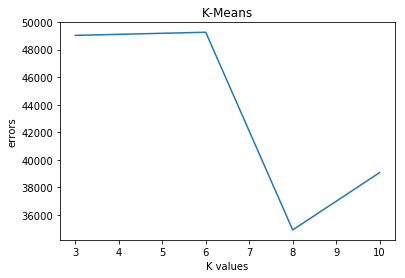

K = 3)
SSE = 49026.62284589317)
K = 6)
SSE = 49254.30336577317)
K = 8)
SSE = 34917.3894808489)
K = 10)
SSE = 39077.40015195828)


In [7]:
data = download_data('cities_life_ratings.csv').values

dimensions = len(data[0])
    
#  evaluating Ks

k_values = [3, 6, 8, 10] # if go higher than 10, need to add to "colors" list
k_errors = []
for k in k_values:
    result_arrays = run_kmeans_clustering(k, showPlots=False, data=data)
        # step 6: calculate the sum of squared errors (SSE) 
    sse_total = 0
    for i in range(k):
        center = result_arrays[i][0]
        samples = result_arrays[i][1]
        print(samples)
        print(center)
        sse_total += get_sum_of_squares(dimensions, center, samples)
    k_errors += [sse_total]
        
plt.plot(k_values, k_errors)
plt.title("K-Means")
plt.xlabel("K values")
plt.ylabel("errors")
plt.show()

for i in range(len(k_values)):
    print("K = {})".format(k_values[i]))
    print("SSE = {})".format(k_errors[i]))

In [8]:
k_errors

[49026.622845893173,
 49254.303365773172,
 34917.389480848899,
 39077.400151958282]

In [11]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv('cities_life_ratings.csv')
print(data.shape)
data.head()

(328, 9)


,521,6200,237,923,4031,2757,996,1405,7633
0,575,8138,1656,886,4883,2438,5564,2632,4350
1,468,7339,618,970,2531,2560,237,859,5250
2,476,7908,1431,610,6883,3399,4655,1617,5864
3,659,8393,1853,1483,6558,3026,4496,2612,5727
4,520,5819,640,727,2444,2972,334,1018,5254


In [12]:
f1 = data['521'].values
f2 = data['6200'].values
f3 = data['237'].values
f4 = data['923'].values
f5 = data['4031'].values
f6 = data['2757'].values
f7 = data['996'].values
f8 = data['1405'].values
f9 = data['7633'].values

X = np.array(list(zip(f1, f2, f3, f4, f5, f6, f7, f8, f9)))

In [13]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [14]:
print(centroids) # From sci-kit learn

[[   526.05614035   7843.81052632    902.52280702    933.1754386
    4040.21403509   2764.13333333   1918.03859649   1739.8877193
    5461.76842105]
 [   622.80952381  11689.85714286   2971.47619048   1114.54761905
    5261.9047619    3156.64285714  10291.88095238   2534.95238095
    5911.19047619]
 [   638.          13358.           7850.           2498.           8625.
    2984.          56745.           3579.           5338.        ]]


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 3 clusters (Distinct clustering)
X, y = make_blobs(n_samples=500, n_features=5, centers=3)

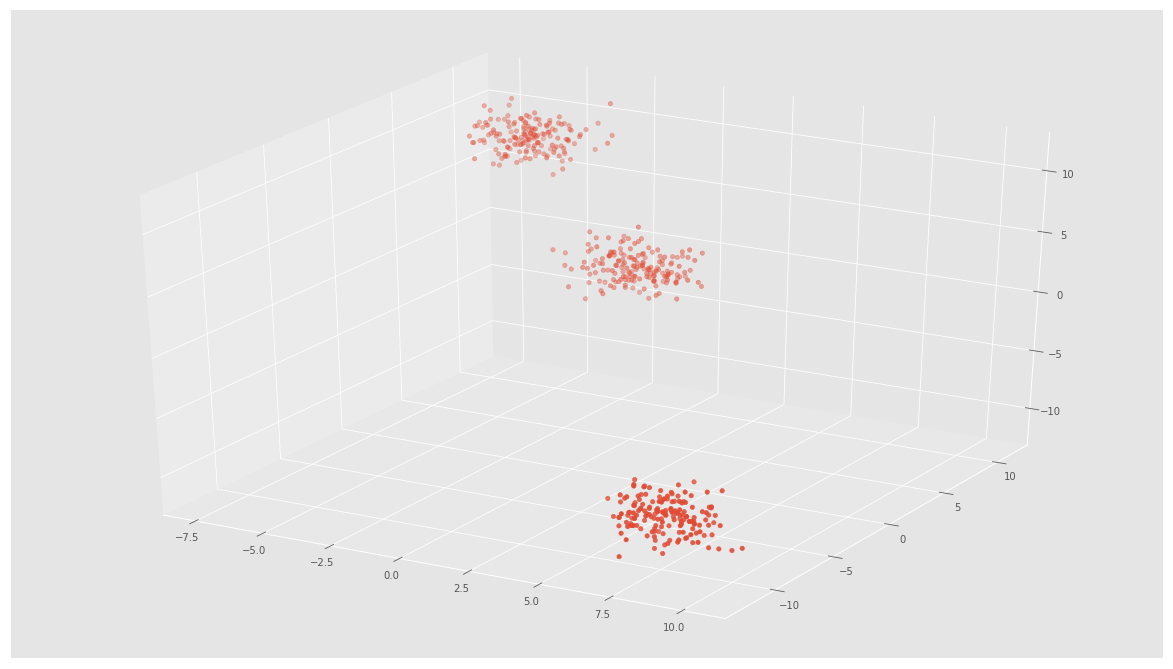

In [94]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [95]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

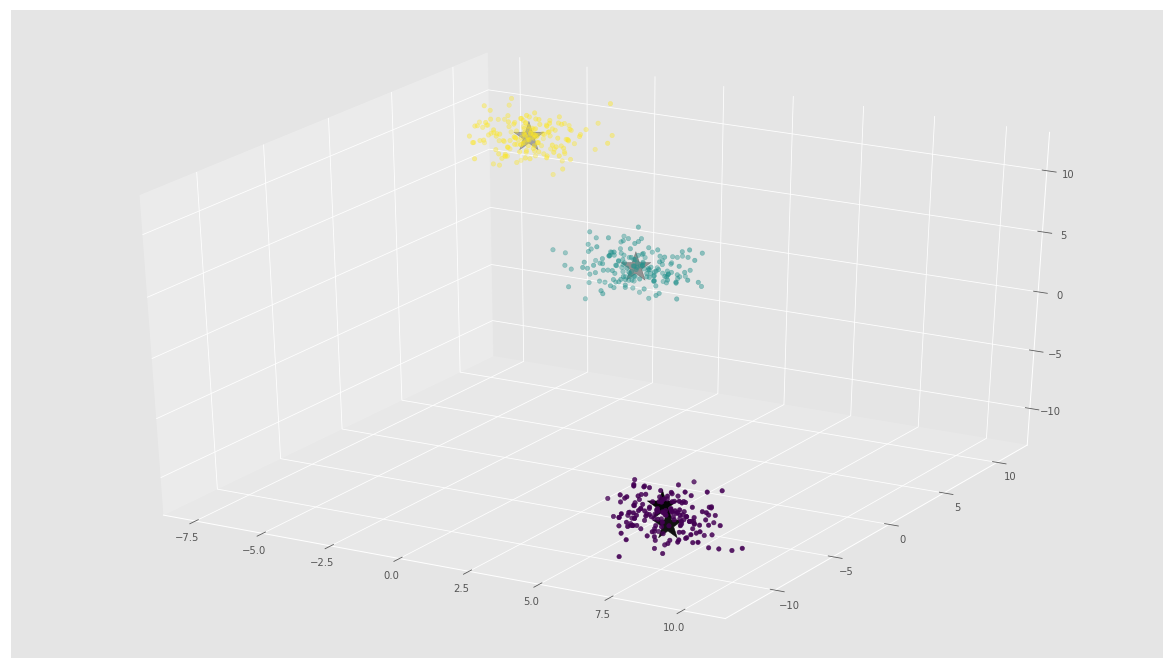

In [96]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

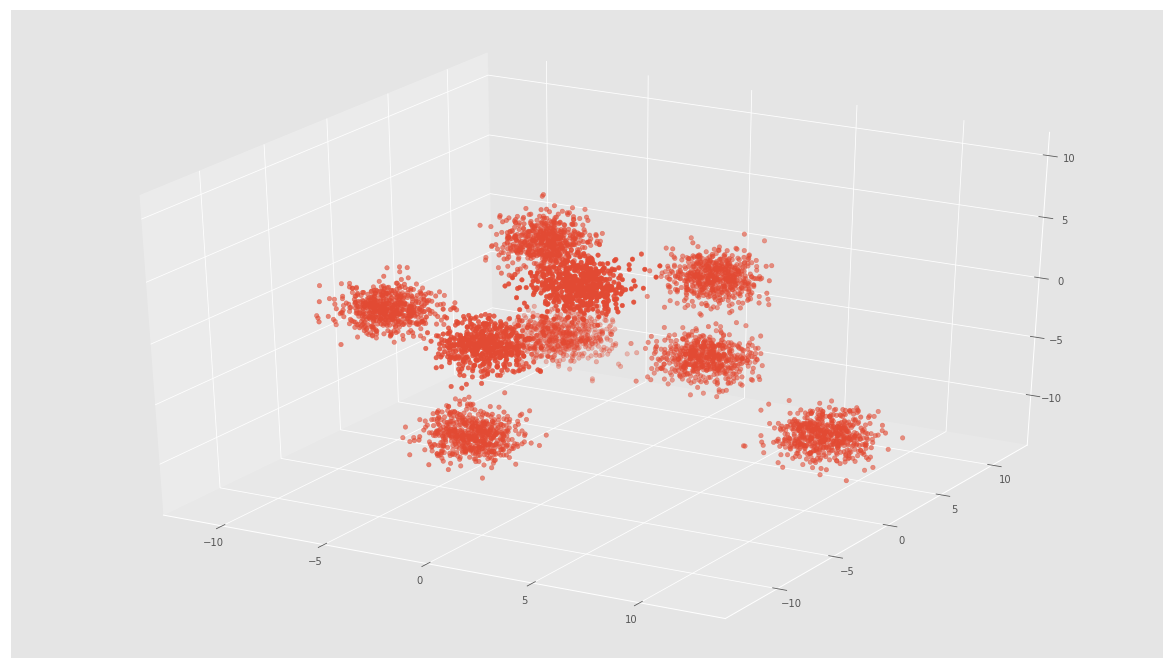

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 9 clusters (Optimal for dataset due to 9 true labels)
X, y = make_blobs(n_samples=5000, n_features=5, centers=9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

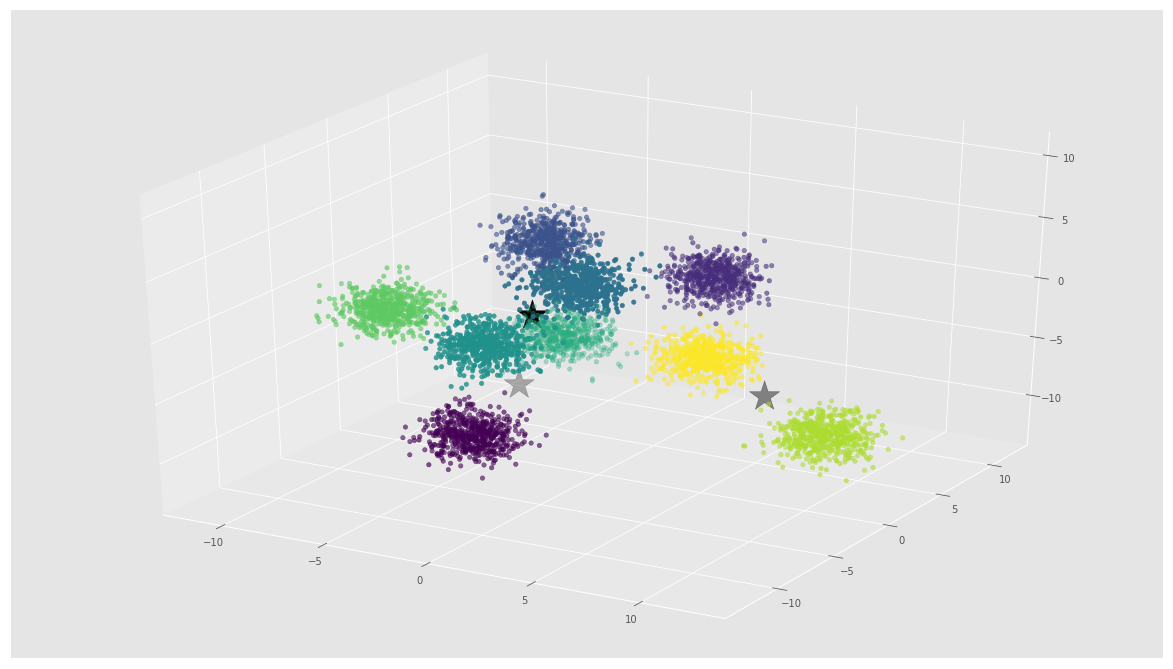

In [102]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)